In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

# Generating Graph

I generate a [Erdos Renyi graph](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) randomly. This graph has 200 nodes and 3011 edges.




In [30]:
G = nx.erdos_renyi_graph(201, 0.15,seed=101)
G.number_of_edges()
G.remove_node(0)
G.number_of_nodes()

200

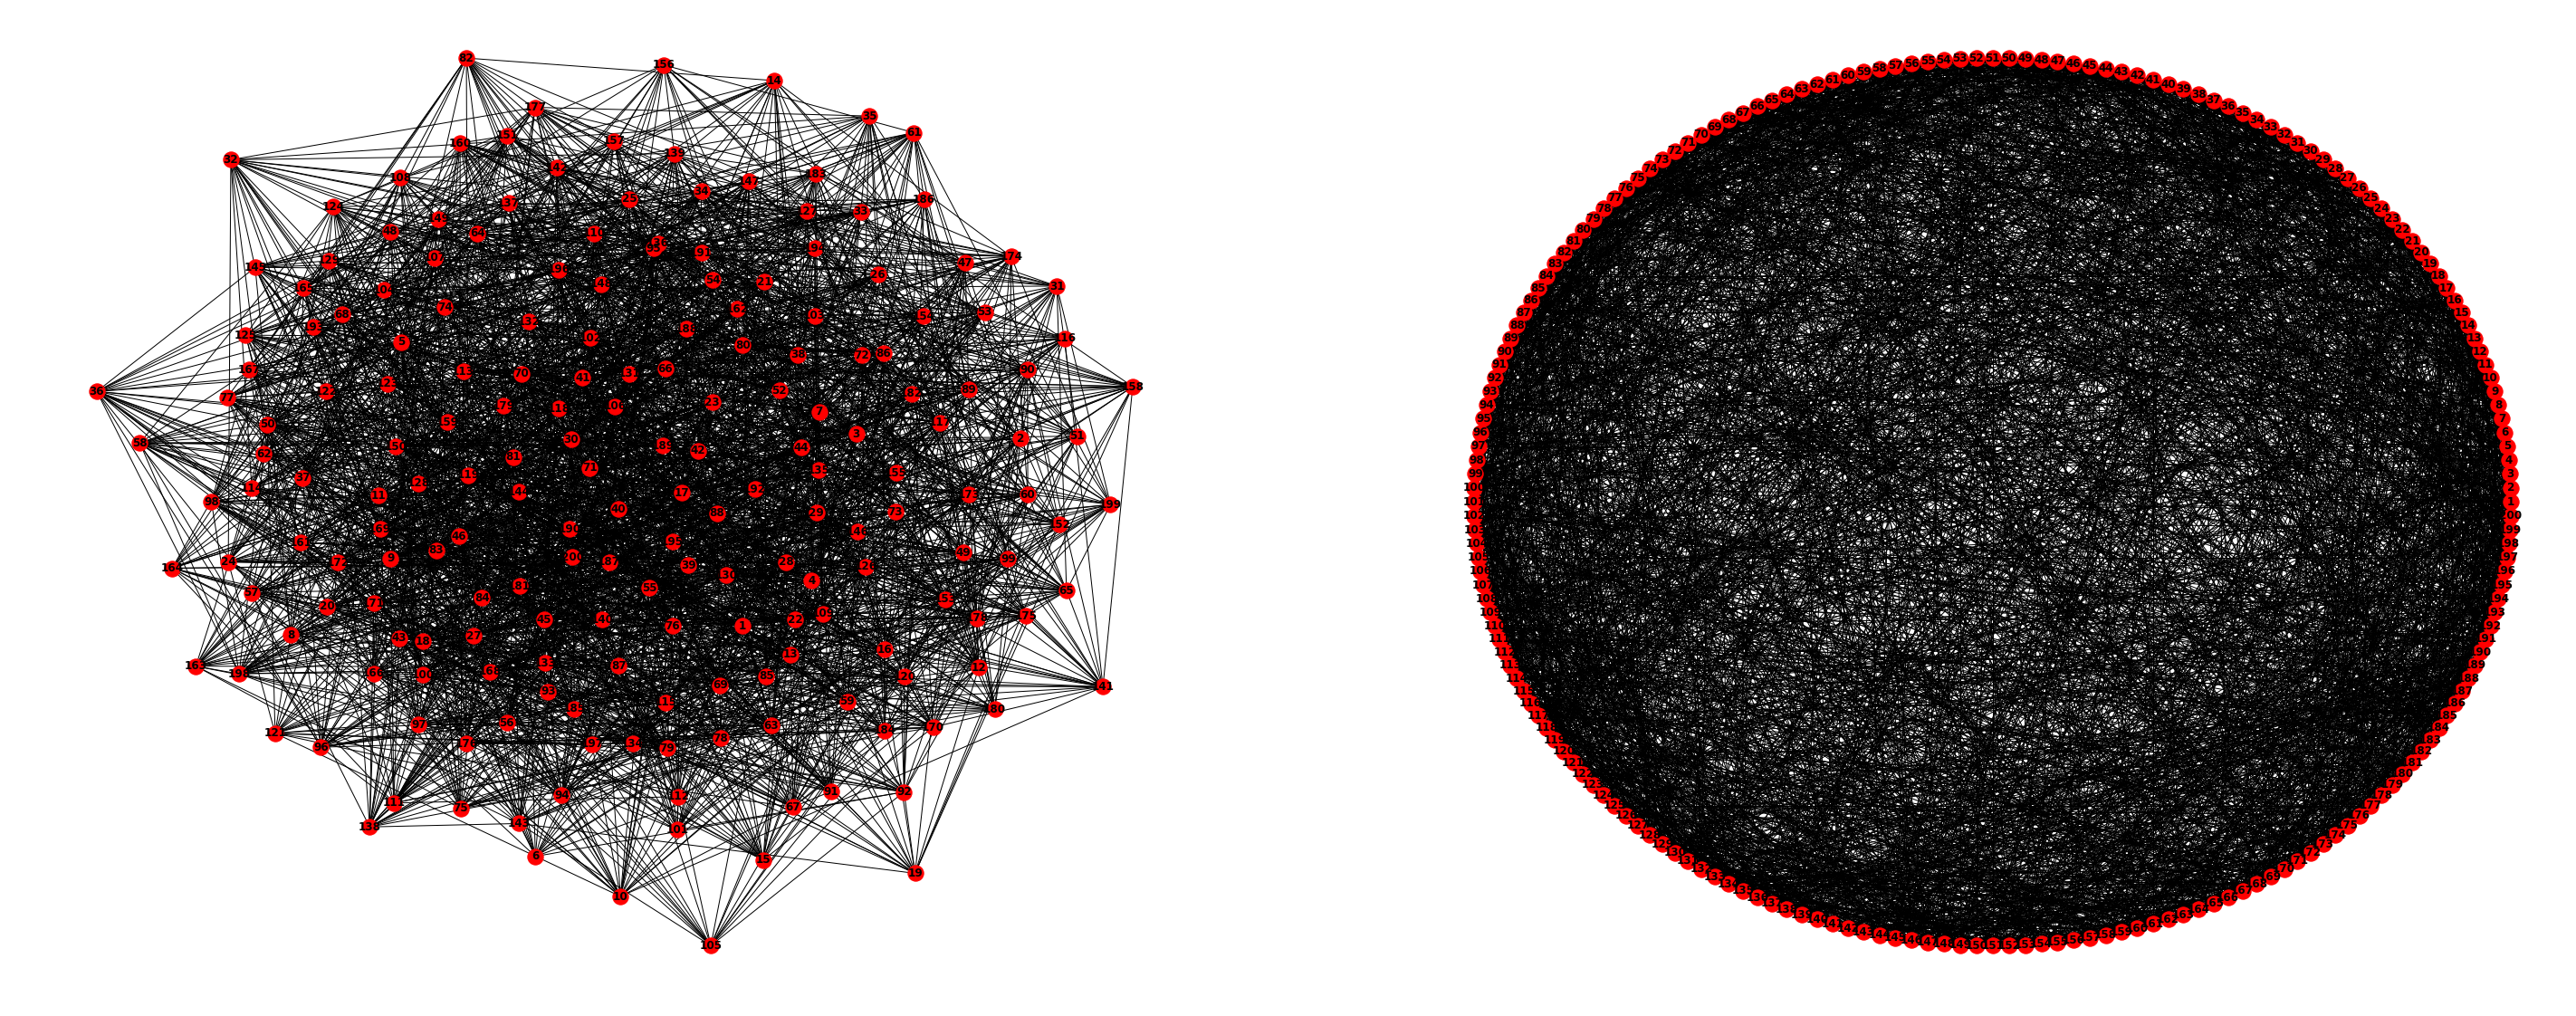

In [31]:
fig, ax = plt.subplots(figsize= (50,20))
plt.subplot(122)
nx.draw_shell(G,with_labels=True, font_weight='bold')
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Generate random data

I use these two function to perform the random work and generate data.

In [34]:
#Positive pair
def CreatingPositivePairs(num_pairs=10, seqlen= 50, random_seed=None):
    '''
    number_pairs: numbers of rows will be generated
    seqlen: The length of sequence
    
    It will randomly chose a starting node and perfrom random walk to
    retrieve 50 nodes. Then, the 50 nodes will be seperated to left and
    right side and be stored in paired_dict.
    '''
    paired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    for i in range(num_pairs):
        node = np.random.randint(1,201) 
        nodes= [node]
        for j in range(seqlen):
            node =np.random.choice(list(G.adj[node]))
            nodes.append(node)
        splitor = np.random.randint(1,seqlen)
        left = nodes[:splitor+1]
        right = nodes[splitor:]
        paired_dict = {'left':left,'right':right,'target':1}
        paired_data.append(paired_dict)
    return paired_data 

#Negative pair
def CreatingNegativePairs(num_pairs=10, seqlen= 50,prob= 0.1, random_seed=None, num_noise=3):
    '''
    number_pairs: numbers of rows will be generated
    seqlen: The length of sequence
    prob: The probability of adding a noise
    num_noise: The minimum amount of noisy points in a sequence.
    
    It will randomly chose a starting node and perfrom random walk to
    retrieve 50 nodes(may contain noise). Then, the 50 nodes will be 
    seperated to left and right side and be stored in paired_dict.
    '''
    unpaired_data=[]
    if random_seed != None:
        np.random.seed(random_seed)
    while len(unpaired_data) < num_pairs:
        node = np.random.randint(1,201) 
        nodes= [node]
        k=0
        for j in range(seqlen):
            if np.random.rand() < prob:
                k+=1
                NotConnectedNode = [x for x in np.arange(1,201) if x not in list(G.adj[node])]
                node =np.random.choice(NotConnectedNode)
            else:    
                node =np.random.choice(list(G.adj[node]))
            nodes.append(node)
        if k < num_noise:
            continue 
        splitor = np.random.randint(1,seqlen)
        left = nodes[:splitor+1]
        right = nodes[splitor:]
        unpaired_dict = {'left':left,'right':right,'target':0}
        unpaired_data.append(unpaired_dict)
    return unpaired_data 

In [35]:
a = pd.DataFrame(CreatingPositivePairs(1000,random_seed=101))
b = pd.DataFrame(CreatingNegativePairs(1000,random_seed=101))
data = pd.concat([a,b])
with open("data.txt", "wb") as fp:   #Pickling
    pickle.dump(data, fp) 
data

,left,right,target
0,"[96, 58, 150, 52, 177, 86, 61, 103, 57, 9, 169...","[59, 144, 156, 169, 172, 80, 46, 94, 46, 57, 7...",1
1,"[98, 177, 34, 174, 136, 143, 37, 192, 37, 143,...","[137, 160, 118, 130, 30, 26, 106, 194, 106, 11...",1
2,"[47, 28, 105, 56, 188, 139]","[139, 144, 127, 103, 169, 146, 35, 194, 175, 5...",1
3,"[62, 159, 109, 150, 120, 140, 105, 60, 83, 105...","[76, 66, 87]",1
4,"[151, 38, 22, 5, 22, 196, 191, 65, 141, 49, 19...","[193, 179, 81, 179, 120, 47, 182, 47, 13, 46, ...",1
5,"[95, 49, 194, 145, 33, 165, 100, 104, 181, 39,...","[109, 112, 189, 190, 24, 70, 27, 63, 99, 127, ...",1
6,"[122, 58, 9, 149, 71, 178, 106, 123, 34, 33, 1...","[110, 117, 80, 186, 4, 152]",1
7,"[133, 78, 111, 40, 160, 150, 89, 26, 35, 177]","[177, 183, 38, 127, 47, 71, 69, 41, 148, 5, 16...",1
8,"[112, 48, 186, 130, 185, 181, 185, 100, 115, 2...","[198, 98, 177, 27, 164, 115, 23, 157, 23, 124,...",1
9,"[144, 172, 148, 112, 33, 5, 77, 200, 81]","[81, 167, 74, 30, 28, 63, 62, 3, 168, 79, 174,...",1
